In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import tiktoken
import requests
import re

In [2]:
# GPT-4's tokenizer
tokenizer = tiktoken.get_encoding('cl100k_base')

In [3]:
text = requests.get('https://www.gutenberg.org/files/35/35-0.txt').text
tm_tokens = tokenizer.encode(text)

# token count by word length

In [4]:
# split by punctuation
words = re.split(r'([,.:;—?_!"“()\']|--|\s)', text)
words = [item.strip() for item in words if item.strip()]

token_count = np.zeros((len(words), 2), dtype=int)

for idx, word in enumerate(words):
    token_count[idx, 0] = len(word) # first column is the length of the word
    token_count[idx, 1] = len(tokenizer.encode(word)) # second column is the number of tokens

In [5]:
plt.figure(figsize=(12,4))

offsetsX = np.random.randn(len(words))/20
offsetsY = np.random.randn(len(words))/20

plt.plot(token_count[:,0]+offsetsX, token_count[:,1]+offsetsY, 'k.', alpha=.5)
plt.gca().set(xlabel='Word lengths', ylabel='Encoded token count', xticks=np.arange(1,np.max(token_count[:,0])+1))

plt.show()

# encoding of 14-character words

In [6]:
# find words with characters
words_with_14_characters = np.where(token_count[:, 0] == 14)[0]

# print their tokens
for idx in words_with_14_characters:
    this_decode = [tokenizer.decode([t]) for t in tokenizer.encode(words[idx])]
    print(f"'{words[idx]}' comprises {this_decode}")

'intermittently' comprises ['inter', 'mitt', 'ently']
'mathematicians' comprises ['math', 'ematic', 'ians']
'Time-Dimension' comprises ['Time', '-D', 'imension']
'Time-Dimension' comprises ['Time', '-D', 'imension']
'Time-Dimension' comprises ['Time', '-D', 'imension']
'investigations' comprises ['invest', 'ig', 'ations']
'Psychologist’s' comprises ['Psych', 'ologist', '’s']
'potentialities' comprises ['potential', 'ities']
'incredibleness' comprises ['in', 'cred', 'ib', 'leness']
'aforementioned' comprises ['a', 'fore', 'mentioned']
'wool-gathering' comprises ['wo', 'ol', '-g', 'athering']
'interpretation' comprises ['interpret', 'ation']
'Nebuchadnezzar' comprises ['N', 'eb', 'uch', 'ad', 'ne', 'zz', 'ar']
'Psychologist’s' comprises ['Psych', 'ologist', '’s']
'overwhelmingly' comprises ['over', 'whelming', 'ly']
'disappointment' comprises ['dis', 'appointment']
'interrogations' comprises ['inter', 'rog', 'ations']
'conversational' comprises ['con', 'vers', 'ational']
'characteristic'

# token efficiency

In [8]:
# "more efficient" word: lots of letters and few tokens
# "less efficient" word: few letters and many tokens
more_efficient = np.where((token_count[:,0]==17) & (token_count[:,1]==2))[0]
less_efficient = np.where((token_count[:,0]==10) & (token_count[:,1]==6))[0]

print(f'A very efficient word:\n  "{words[more_efficient[0]]}" has {token_count[more_efficient[0],0]} letters and {token_count[more_efficient[0],1]} tokens.\n')
print(f'An inefficient word:\n  "{words[less_efficient[0]]}" has {token_count[less_efficient[0],0]} letters and {token_count[less_efficient[0],1]} tokens.')

A very efficient word:
  "three-dimensional" has 17 letters and 2 tokens.

An inefficient word:
  "gynæceum’s" has 10 letters and 6 tokens.


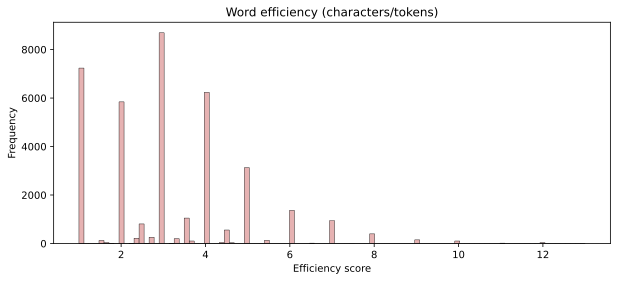

In [9]:
# "efficiency" as characters/tokens
efficiency = token_count[:, 0] / token_count[:, 1]

# show a histogram
plt.figure(figsize=(10,4))
plt.hist(efficiency, color=[.9,.7,.7], edgecolor="k", linewidth=.4, bins='fd')
plt.gca().set(xlabel='Efficiency score', ylabel='Frequency', title='Word efficiency (characters/tokens)')
plt.show()

In [10]:
# find the most and least effciently tokenized words
max_efficiency = np.max(efficiency)
min_efficiency = np.min(efficiency)

# find all the words with those efficiency values
most_efficient_words = np.where(efficiency==max_efficiency)[0]
least_efficient_words = np.where(efficiency==min_efficiency)[0]

# find and print the unique words with max-efficiency score
most_efficient_words = list(set([words[i] for i in most_efficient_words]))

print('MOST EFFICIENT WORDS:')
for w in most_efficient_words:
    print(f'"{w}" has {max_efficiency} characters per token')

# repeat for min-efficiency score
print('\n\nLEAST EFFICIENT WORDS:')
for w in list(set([ words[i] for i in least_efficient_words ])):
    print(f'"{w}" has {min_efficiency:.2f} characters per token')

MOST EFFICIENT WORDS:
"communication" has 13.0 characters per token
"advertisement" has 13.0 characters per token


LEAST EFFICIENT WORDS:
"V" has 1.00 characters per token
"D" has 1.00 characters per token
"?" has 1.00 characters per token
";" has 1.00 characters per token
"“" has 1.00 characters per token
"," has 1.00 characters per token
"A" has 1.00 characters per token
"X" has 1.00 characters per token
"—" has 1.00 characters per token
"H" has 1.00 characters per token
"I" has 1.00 characters per token
":" has 1.00 characters per token
"_" has 1.00 characters per token
"XV" has 1.00 characters per token
"G" has 1.00 characters per token
"”" has 1.00 characters per token
"]" has 1.00 characters per token
"a" has 1.00 characters per token
"‘I" has 1.00 characters per token
")" has 1.00 characters per token
"’" has 1.00 characters per token
"(" has 1.00 characters per token
"!" has 1.00 characters per token
"." has 1.00 characters per token
"…" has 1.00 characters per token


# Tokens in separated words vs. text

In [11]:
# unique set of words as we've split them up
unique_words = set(words)
print(f'There are {len(unique_words)} unique words in The Time Machine according to our split.')

There are 5007 unique words in The Time Machine according to our split.


In [16]:
# random token
token_idx = np.random.randint(0,tokenizer.n_vocab//10)

# non-random tokens to try
# token_idx = 1879#,5030#,716

# find the words (from our split) in The Time Machine that contain that token
words_with_token = [w for w in unique_words if token_idx in tokenizer.encode(w)]

# find the context (from the full encoding) surrounding each token appearance
seqs_with_token = np.array(tm_tokens) == token_idx

# print the token
print(f'Token {token_idx} is "{tokenizer.decode([token_idx])}"\n\n')

# its occurance in our manually split words
print(f'*** Our manual word split: Token appears {len(words_with_token)} times, including:\n----------------')
for w in words_with_token:
    print(f'{w}')

# its occurances in the GPT encoding
print(f'\n\n*** From encoding the full text: This token appears {sum(seqs_with_token)} times, including:\n----------------')
for s in np.where(seqs_with_token)[0]:
  print(f'{tokenizer.decode( np.array(tm_tokens[s-5:s+5]) )}\n----------------')

Token 8566 is "fol"


*** Our manual word split: Token appears 3 times, including:
----------------
foliage
foliated
folly


*** From encoding the full text: This token appears 1 times, including:
----------------
 light, among the
foliated sheets of intense
----------------


# Do more frequent words have fewer tokens?

In [17]:
# the unique words, as a list instead of a set (for indexing)
unique_words = list(unique_words)

# initialize results vector
word_freq = np.zeros(len(unique_words), dtype=int)
num_tokens = np.zeros(len(unique_words), dtype=int)

# loop through all unique words
for i, word in enumerate(unique_words):
    # count the number of times that word appears
    word_freq[i] = words.count(word)
    # count the number of tokens in that word
    num_tokens[i] = len(tokenizer.encode(word))

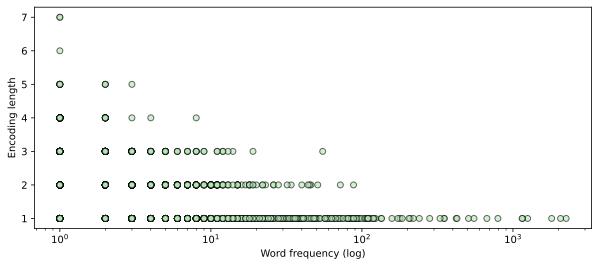

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(word_freq, num_tokens, 'ko', markerfacecolor=[.7,.9,.7], alpha=.6)
plt.gca().set(xlabel='Word frequency (log)', ylabel='Encoding length', xscale='log')
plt.show()

In [ ]:
wordFreqidx = np.argsort(word_freq)[::-1]
for i in wordFreqidx[:20]:
    print(f'{word_freq[i]:>5,} appearances of "{unique_words[i]}"')

2,250 appearances of ","
2,066 appearances of "the"
1,804 appearances of "."
1,251 appearances of "I"
1,157 appearances of "of"
1,150 appearances of "and"
  795 appearances of "a"
  672 appearances of "to"
  552 appearances of "was"
  508 appearances of "in"
  426 appearances of "my"
  421 appearances of "that"
  351 appearances of "“"
  350 appearances of "had"
  329 appearances of "it"
  281 appearances of "me"
  240 appearances of "as"
  219 appearances of "The"
  209 appearances of "with"
  205 appearances of "at"


# fake words from real tokens

In [23]:
n_tokens = 3

# choose some random tokens
random_tokens = np.random.choice(range(tokenizer.n_vocab), n_tokens)

# print the individual tokens
for t in random_tokens:
    print(f"Token {t} is '{tokenizer.decode([t])}'")

# fake word without whitespaces
fake_word = re.sub(r'\s+', '', tokenizer.decode(random_tokens))

print(f"\n The fake word is '{fake_word}'")

Token 849 is 'Ex'
Token 7166 is '(y'
Token 13668 is ' disk'

 The fake word is 'Ex(ydisk'
